In [1]:
import numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
train=pd.read_csv("/home/ad/Desktop/github/loan prediction/data/train.csv")

In [4]:
test=pd.read_csv("/home/ad/Desktop/github/loan prediction/data/test.csv")

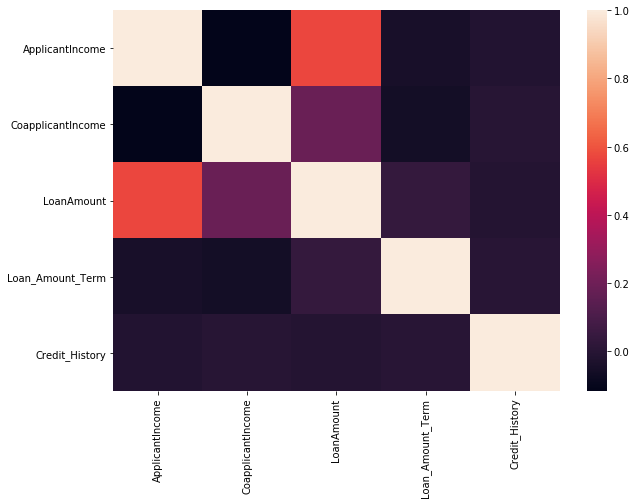

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr())

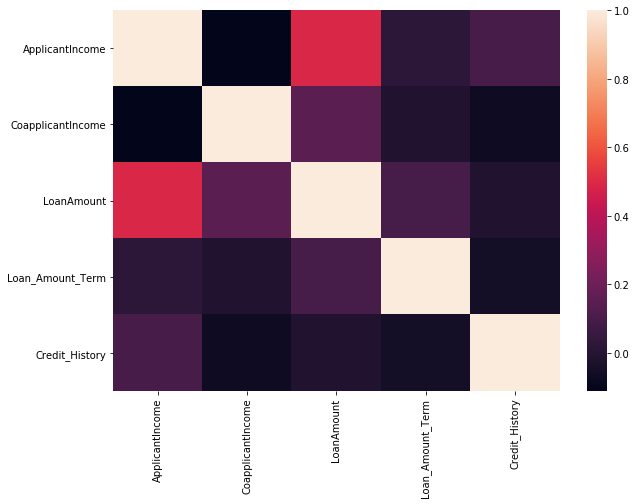

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(test.corr())

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
train['Type']="train"

In [10]:
test["Type"]="test"

In [11]:
df=[train,test]

In [12]:
df=pd.concat(df,ignore_index=True)

In [13]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Type
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [14]:
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
Type                   0
dtype: int64

In [15]:
df['ApplicantIncome'].mean()

5179.795107033639

In [16]:
df['CoapplicantIncome'].mean()

1601.9163302636496

In [17]:
df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [18]:
df.groupby(['Gender','Credit_History']).size()

Gender  Credit_History
Female  0.0                30
        1.0               135
Male    0.0               113
        1.0               601
dtype: int64

In [19]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [20]:
df.loc[((df["Married"])!="Yes")&((df["Married"])!="No")]

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Type
104,3816,754.0,1.0,NaN,Graduate,Male,160.0,360.0,LP001357,Y,NaN,Urban,No,train
228,4758,0.0,1.0,NaN,Graduate,Male,158.0,480.0,LP001760,Y,NaN,Semiurban,No,train
435,10047,0.0,1.0,NaN,Graduate,Female,NaN,240.0,LP002393,Y,NaN,Semiurban,No,train


# Dependents and married values are missing
so we can impute married status as no and dependents zero

In [21]:
df.loc[((df["Married"])!="Yes")&((df["Married"])!="No"),"Dependents"]=0

In [22]:
df.loc[((df["Married"])!="Yes")&((df["Married"])!="No")]

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Type
104,3816,754.0,1.0,0,Graduate,Male,160.0,360.0,LP001357,Y,NaN,Urban,No,train
228,4758,0.0,1.0,0,Graduate,Male,158.0,480.0,LP001760,Y,NaN,Semiurban,No,train
435,10047,0.0,1.0,0,Graduate,Female,NaN,240.0,LP002393,Y,NaN,Semiurban,No,train


In [23]:
df.loc[((df["Married"])!="Yes")&((df["Married"])!="No"),"Married"]="No"

In [24]:
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            22
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
Type                   0
dtype: int64

In [25]:
df.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [26]:
df.loc[(df["Self_Employed"]).isnull()].head(6)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Type
11,2500,1840.0,1.0,2,Graduate,Male,109.0,360.0,LP001027,Y,Yes,Urban,NaN,train
19,2600,3500.0,1.0,0,Graduate,Male,115.0,NaN,LP001041,Y,Yes,Urban,NaN,train
24,3717,2925.0,NaN,1,Graduate,Male,151.0,360.0,LP001052,N,Yes,Semiurban,NaN,train
29,3750,2083.0,1.0,2,Graduate,Female,120.0,360.0,LP001087,Y,No,Semiurban,NaN,train
30,4166,3369.0,NaN,1,Graduate,Male,201.0,360.0,LP001091,N,Yes,Urban,NaN,train
95,6782,0.0,NaN,0,Graduate,Male,NaN,360.0,LP001326,N,No,Urban,NaN,train


In [27]:
df.groupby(['Self_Employed','Property_Area']).size()

Self_Employed  Property_Area
No             Rural            228
               Semiurban        292
               Urban            287
Yes            Rural             44
               Semiurban         40
               Urban             35
dtype: int64

In [28]:
df.groupby(['Self_Employed','Education']).size()

Self_Employed  Education   
No             Graduate        626
               Not Graduate    181
Yes            Graduate         94
               Not Graduate     25
dtype: int64

In [29]:
df.groupby(['Self_Employed','Education','Property_Area']).size()

Self_Employed  Education     Property_Area
No             Graduate      Rural            167
                             Semiurban        231
                             Urban            228
               Not Graduate  Rural             61
                             Semiurban         61
                             Urban             59
Yes            Graduate      Rural             37
                             Semiurban         30
                             Urban             27
               Not Graduate  Rural              7
                             Semiurban         10
                             Urban              8
dtype: int64

In [30]:
df.groupby(['Gender','Education']).size()

Gender  Education   
Female  Graduate        148
        Not Graduate     34
Male    Graduate        596
        Not Graduate    179
dtype: int64

In [31]:
df.groupby(['Self_Employed','Gender']).size()

Self_Employed  Gender
No             Female    152
               Male      637
Yes            Female     19
               Male       94
dtype: int64

In [32]:
df.groupby(['Self_Employed','Gender','Education']).size()

Self_Employed  Gender  Education   
No             Female  Graduate        124
                       Not Graduate     28
               Male    Graduate        488
                       Not Graduate    149
Yes            Female  Graduate         15
                       Not Graduate      4
               Male    Graduate         74
                       Not Graduate     20
dtype: int64

In [33]:
df.groupby(['Gender','Dependents']).size()

Gender  Dependents
Female  0               1
        0             123
        1              32
        2              13
        3+              9
Male    0               2
        0             408
        1             125
        2             145
        3+             78
dtype: int64

In [34]:
df.Dependents.value_counts()

0     545
2     160
1     160
3+     91
0       3
Name: Dependents, dtype: int64

In [35]:
df['Dependents'].replace([0,2,1,'3+'],[0,2,1,3],inplace=True)

In [36]:
df.Dependents.value_counts()

0    545
2    160
1    160
3     91
0      3
Name: Dependents, dtype: int64

In [37]:
#the three zeros we imputed previous stored as string
df['Dependents'].replace([0,'0'],[0,0],inplace=True)

In [38]:
df['ApplicantIncome'].mean()

5179.795107033639

In [39]:
df['Dependents'].fillna(0,inplace=True)

In [40]:
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents             0
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
Type                   0
dtype: int64

In [41]:
df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [42]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Type,Total_income
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train,5849.0
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train,6091.0
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train,3000.0
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train,4941.0
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train,6000.0


In [43]:
del df['ApplicantIncome']
del df['CoapplicantIncome']

In [44]:
df.head(5)

,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Type,Total_income
0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train,5849.0
1,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train,6091.0
2,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train,3000.0
3,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train,4941.0
4,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train,6000.0


In [45]:
df.Self_Employed.fillna("No",inplace=True)

In [46]:
df.isnull().sum()

Credit_History       79
Dependents            0
Education             0
Gender               24
LoanAmount           27
Loan_Amount_Term     20
Loan_ID               0
Loan_Status         367
Married               0
Property_Area         0
Self_Employed         0
Type                  0
Total_income          0
dtype: int64

In [47]:
df.Gender.fillna("Male",inplace=True)

In [48]:
df.groupby(['Loan_Amount_Term','Gender','Education']).size()

Loan_Amount_Term  Gender  Education   
6.0               Male    Graduate          1
12.0              Male    Graduate          2
36.0              Female  Graduate          1
                  Male    Not Graduate      2
60.0              Male    Graduate          2
                          Not Graduate      1
84.0              Female  Graduate          2
                  Male    Graduate          5
120.0             Male    Graduate          3
                          Not Graduate      1
180.0             Female  Graduate          5
                          Not Graduate      1
                  Male    Graduate         41
                          Not Graduate     19
240.0             Female  Graduate          1
                  Male    Graduate          6
                          Not Graduate      1
300.0             Female  Graduate          4
                  Male    Graduate         11
                          Not Graduate      5
350.0             Male    Graduate       

In [49]:
df.groupby(['Dependents','Gender','Education']).size()

Dependents  Gender  Education   
0           Female  Graduate        106
                    Not Graduate     22
            Male    Graduate        349
                    Not Graduate     93
3           Female  Graduate          6
                    Not Graduate      3
            Male    Graduate         56
                    Not Graduate     26
1           Female  Graduate         25
                    Not Graduate      7
            Male    Graduate        103
                    Not Graduate     25
2           Female  Graduate         11
                    Not Graduate      2
            Male    Graduate        107
                    Not Graduate     40
dtype: int64

In [50]:
df.groupby(['Loan_Amount_Term','Education','Dependents']).size()

Loan_Amount_Term  Education     Dependents
6.0               Graduate      0               1
12.0              Graduate      0               1
                                2               1
36.0              Graduate      1               1
                  Not Graduate  0               2
60.0              Graduate      0               1
                                1               1
                  Not Graduate  3               1
84.0              Graduate      0               2
                                1               3
                                2               2
120.0             Graduate      0               1
                                3               1
                                2               1
                  Not Graduate  0               1
180.0             Graduate      0              26
                                3               7
                                1               6
                                2               7
       

In [51]:
df.Loan_Amount_Term.fillna(360,inplace=True)

In [52]:
df.isnull().sum()

Credit_History       79
Dependents            0
Education             0
Gender                0
LoanAmount           27
Loan_Amount_Term      0
Loan_ID               0
Loan_Status         367
Married               0
Property_Area         0
Self_Employed         0
Type                  0
Total_income          0
dtype: int64

In [53]:
df.groupby('Gender',as_index=False)['LoanAmount'].mean()

,Gender,LoanAmount
0,Female,126.735955
1,Male,146.130155


In [54]:
df.groupby('Education',as_index=False)['LoanAmount'].mean()

,Education,LoanAmount
0,Graduate,149.297043
1,Not Graduate,118.471429


In [55]:
df.groupby('Property_Area',as_index=False)['LoanAmount'].mean()

,Property_Area,LoanAmount
0,Rural,146.787986
1,Semiurban,141.684211
2,Urban,139.693009


In [56]:
df.groupby('Married',as_index=False)['LoanAmount'].mean()

,Married,LoanAmount
0,No,126.204678
1,Yes,151.624183


In [57]:
df.groupby('Dependents',as_index=False)['LoanAmount'].mean()

,Dependents,LoanAmount
0,0,133.447653
1,3,170.876404
2,1,149.389610
3,2,151.668790


In [58]:
df.loc[(df["LoanAmount"]).isnull()].groupby(['Dependents','Gender','Education']).size()

Dependents  Gender  Education   
0           Female  Graduate         2
            Male    Graduate        10
                    Not Graduate     4
3           Female  Not Graduate     1
            Male    Not Graduate     1
1           Female  Graduate         1
            Male    Graduate         4
                    Not Graduate     1
2           Male    Graduate         2
                    Not Graduate     1
dtype: int64

In [59]:
df.loc[((df["LoanAmount"]).isnull())&((df["Married"])=="Y")&((df["Dependents"]==3)),"LoanAmount"]=175

In [60]:
df.loc[((df["LoanAmount"]).isnull())&((df["Married"])=="Y")&((df["Dependents"]==1)),"LoanAmount"]=135

In [61]:
df.loc[((df["LoanAmount"]).isnull())&((df["Married"])=="N")&((df["Dependents"]==0)),"LoanAmount"]=115

In [62]:
df.loc[(df["LoanAmount"]).isnull()].groupby(['Dependents','Gender','Education']).size()

Dependents  Gender  Education   
0           Female  Graduate         2
            Male    Graduate        10
                    Not Graduate     4
3           Female  Not Graduate     1
            Male    Not Graduate     1
1           Female  Graduate         1
            Male    Graduate         4
                    Not Graduate     1
2           Male    Graduate         2
                    Not Graduate     1
dtype: int64

In [63]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)

In [64]:
df['Education'].replace(['Graduate','Not Graduate'],[1,2],inplace=True)

In [65]:
df['Gender'].replace(['Male','Female'],[1,2],inplace=True)

In [66]:
df['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)

In [67]:
df['Married'].replace(['No','Yes'],[0,1],inplace=True)

In [68]:
df['Property_Area'].replace(['Urban','Semiurban','Rural'],[1,2,3],inplace=True)

In [69]:
df['Self_Employed'].replace(['Yes','No'],[1,0],inplace=True)

In [70]:
df.head(3)

,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Type,Total_income
0,1.0,0,1,1,142.51153,360.0,LP001002,1.0,0,1,0,train,5849.0
1,1.0,1,1,1,128.00000,360.0,LP001003,0.0,1,3,0,train,6091.0
2,1.0,0,1,1,66.00000,360.0,LP001005,1.0,1,1,1,train,3000.0


# Now we have to  impute credit history

In [71]:
del df['Loan_ID']

In [72]:
df.columns

Index(['Credit_History', 'Dependents', 'Education', 'Gender', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Married', 'Property_Area',
       'Self_Employed', 'Type', 'Total_income'],
      dtype='object')

In [73]:
df.isna().sum()

Credit_History       79
Dependents            0
Education             0
Gender                0
LoanAmount            0
Loan_Amount_Term      0
Loan_Status         367
Married               0
Property_Area         0
Self_Employed         0
Type                  0
Total_income          0
dtype: int64

In [102]:
df.dtypes

Credit_History      float64
Dependents          float64
Education             int64
Gender                int64
LoanAmount            int64
Loan_Amount_Term      int64
Loan_Status         float64
Married               int64
Property_Area         int64
Self_Employed         int64
Type                 object
Total_income          int64
dtype: object

In [139]:
df.Credit_History.fillna(df.Credit_History.mode,inplace=True)

In [140]:
df['Dependents']=df['Dependents'].astype(float)

In [141]:
train1=df[:614]

In [142]:
test1=df[616:]

In [143]:
train11=train1[['Credit_History','Dependents', 'Education', 'Gender', 'LoanAmount','Loan_Amount_Term', 'Married', 'Property_Area','Self_Employed', 'Total_income']]

In [144]:
train12=train1['Loan_Status']

In [145]:
train12.dtypes

dtype('float64')

In [146]:
df.isnull().sum()

Credit_History        0
Dependents            0
Education             0
Gender                0
LoanAmount            0
Loan_Amount_Term      0
Loan_Status         367
Married               0
Property_Area         0
Self_Employed         0
Total_income          0
dtype: int64

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
lr=LogisticRegression()
model=lr.fit(train11,train12)
model.predict(z)